In [52]:
import torch
import torchvision
import matplotlib.pyplot as plt
import numpy as np

In [56]:
train = torchvision.datasets.STL10(
    root='../dataset',
    split='train',
    download=True,
)
test = torchvision.datasets.STL10(
    root='../dataset',
    split='test',
    download=True,
)

Files already downloaded and verified
Files already downloaded and verified


In [59]:
(vars(train)['data']).shape

(5000, 3, 96, 96)

In [68]:
for i in range(4000):
    data, label = train.__getitem__(i)
    data.save(f'../dataset/train/{i}_{label}.png')

In [71]:
for i in range(4000, 5000):
    data, label = train.__getitem__(i)
    data.save(f'../dataset/valid/{i}_{label}.png')

In [72]:
for i in range(1000):
    data, label = test.__getitem__(i)
    data.save(f'../dataset/test/{i}_{label}.png')

In [10]:
import os
os.getcwd()

'/home/intern_lhj/pytorch_example/ipynbs'

(array([402., 387., 393., 401., 397., 406., 412., 403., 404., 395.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

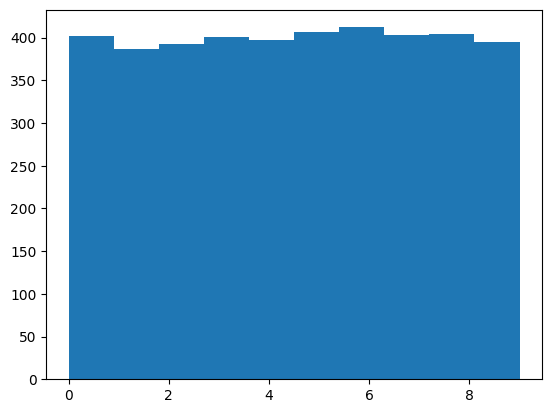

In [66]:
label_list = list()
for i in range(4000):
    data, label = train.__getitem__(i)
    label_list.append(label)    
plt.hist(label_list)

In [3]:
train_dataset = torchvision.datasets.STL10(
    root = '../dataset', 
    split = 'train', 
    download = True)

test_dataset = torchvision.datasets.STL10(
    root = '../dataset', 
    split = 'test', 
    download = True)

Files already downloaded and verified
Files already downloaded and verified


In [4]:
vars(train_dataset).keys()

dict_keys(['root', 'transform', 'target_transform', 'transforms', 'split', 'folds', 'data', 'labels', 'classes'])

In [6]:
vars(train_dataset)['data'].shape

(5000, 3, 96, 96)

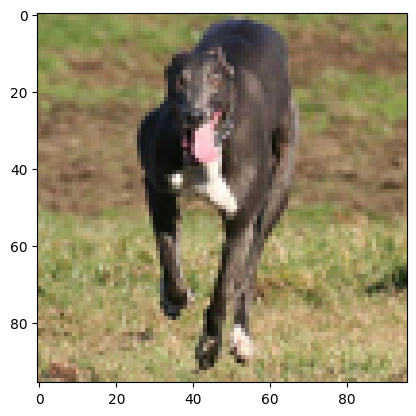

In [13]:
sample_image1 = train_dataset.__getitem__(1)[0]
sample_image2 = train_dataset.__getitem__(2)[0]
sample_image3 = train_dataset.__getitem__(3)[0]
sample_image4 = train_dataset.__getitem__(4)[0]
target1 = train_dataset.__getitem__(1)[1]
target2 = train_dataset.__getitem__(2)[1]
target3 = train_dataset.__getitem__(3)[1]
target4 = train_dataset.__getitem__(4)[1]
plt.imshow(sample_image1)

In [14]:
tensor_image1 = torchvision.transforms.functional.pil_to_tensor(sample_image1)
tensor_image2 = torchvision.transforms.functional.pil_to_tensor(sample_image2)
tensor_image3 = torchvision.transforms.functional.pil_to_tensor(sample_image3)
tensor_image4 = torchvision.transforms.functional.pil_to_tensor(sample_image4)
tensor_images = torch.stack([tensor_image1, tensor_image2, tensor_image3, tensor_image4])
tensor_images.shape

torch.Size([4, 3, 96, 96])

In [34]:
def mixup(data, target, alpha=1.0):
    indices = torch.randperm(data.size(0))
    shuffled_data = data[indices]
    shuffled_target = target[indices]
    
    lam = np.random.beta(alpha, alpha)
    new_data = data * lam + shuffled_data * (1 - lam)
    return new_data, target, shuffled_target, lam

def cutmix(data, target, alpha=1.0):
    indices = torch.randperm(data.size(0))
    shuffled_data = data[indices]
    shuffled_target = target[indices]
    
    lam = np.random.beta(alpha, alpha)
    bbx1, bby1, bbx2, bby2 = rand_bbox(data.size(), lam)
    new_data = data.clone()
    new_data[:, :, bbx1:bbx2, bby1:bby2] = shuffled_data[:, :, bbx1:bbx2, bby1:bby2]
    
    lam = 1 - ((bbx2 - bbx1) * (bby2 - bby1) / (data.size()[-1] * data.size()[-2]))
    
    return new_data, target, shuffled_target, lam

def rand_bbox(size, lam):
    W = size[2]
    H = size[3]
    cut_rat = np.sqrt(1. - lam)
    cut_w = int(W * cut_rat)
    cut_h = int(H * cut_rat)

    cx = np.random.randint(W)
    cy = np.random.randint(H)

    bbx1 = np.clip(cx - cut_w // 2, 0, W)
    bby1 = np.clip(cy - cut_h // 2, 0, H)
    bbx2 = np.clip(cx + cut_w // 2, 0, W)
    bby2 = np.clip(cy + cut_h // 2, 0, H)

    return bbx1, bby1, bbx2, bby2


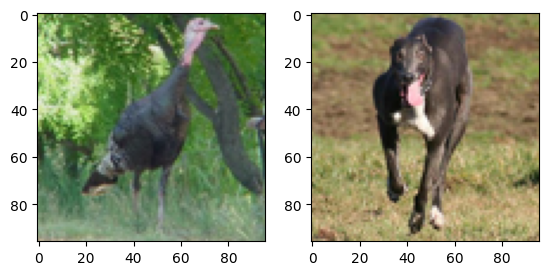

In [35]:
output = mixup(tensor_images, torch.tensor([target1, target2, target3, target4]))
plt.figure(figsize = (10, 20))
plt.subplot(1,3,1)
plt.imshow(output[0][0].permute(1,2,0).to(int))
plt.subplot(1,3,2)
plt.imshow(tensor_images[0].permute(1,2,0).to(int))


In [36]:
output[1], output[2], output[3]

(tensor([5, 1, 6, 3]), tensor([1, 5, 3, 6]), 0.11160573042115023)

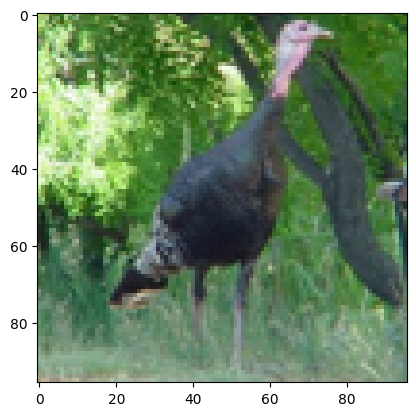

In [37]:
plt.imshow(tensor_images[1].permute(1,2,0).to(int))


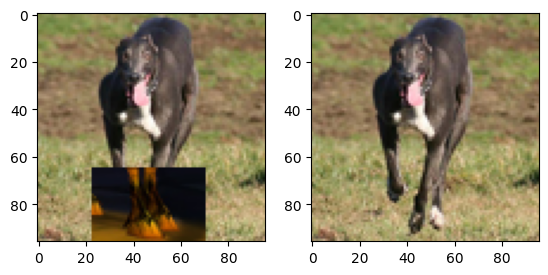

In [38]:
output = cutmix(tensor_images, torch.tensor([target1, target2, target3, target4]))
plt.figure(figsize = (10, 20))
plt.subplot(1,3,1)
plt.imshow(output[0][0].permute(1,2,0).to(int))
plt.subplot(1,3,2)
plt.imshow(tensor_images[0].permute(1,2,0).to(int))


In [39]:
output[1], output[2], output[3]

(tensor([5, 1, 6, 3]), tensor([6, 5, 1, 3]), 0.8385416666666666)

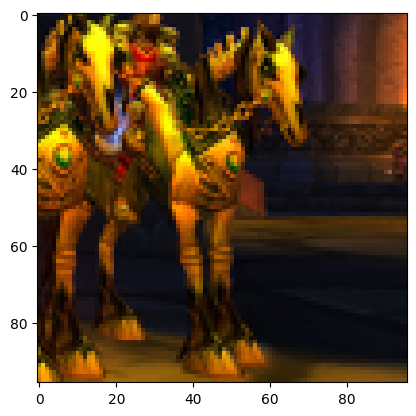

In [40]:
plt.imshow(tensor_images[2].permute(1,2,0).to(int))
